### <font color='blue' size=8pt> Support Vector Regression </font>


Support Vector Machines Seminal Paper (1992): http://www.svms.org/training/BOGV92.pdf



Support Vectors is a method used in Machine Learning for both regression and classification problmes. The main idea is to map the input features into a higher dimensional space and then, in that higher dimensional space, address the problem to solve.

For regression, SVM consists of an algorithm that solves a quadratic optimization problem with constraints:

$$\large
\text{minimize}\frac{1}{2}\|w\|^2
$$

subject to

$$\large{
y_i -wx_i - b\leq\epsilon\\
wx_i+b-y_i \leq \epsilon}
$$

We can express the constrints as:

$$\large |y_i - (wx_i+b)|\leq\epsilon$$
Intuitively we have


<figure>
<center>
<img src='https://i.imgur.com/1dJCvHw.png'
width='600px' />
<figcaption>Main Idea for SVR in 1-D</figcaption></center>
</figure>


#### Slack Variables

SVR with slack variables consists of an algorithm that solves a quadratic optimization problem with constraints:

$$
\text{minimize}\frac{1}{2}\|w\|^2 + C\sum_{i=1}^{n}|\xi_i|
$$

subject to

$$
|y_i - x_i\cdot w - b|\leq\epsilon + |\xi_i|
$$

where $x_i = (x_{i1},x_{i2},...x_{ip})$ represents the ith observation that has $p$ features and $w$ is the vector of the weights. We have $1\times p \cdot p\times 1 = 1\times 1$ The main idea is that the slack variables will accommodate points that are "close" to the epsilon margins and that may influence the influence the value of the weights.

<font color='green'> This means that we have at least two different hyperparameters in this case such as </font> $\epsilon$ and $C$.


### Code Applications
---

### Setup

In [1]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse

### Variability in Data

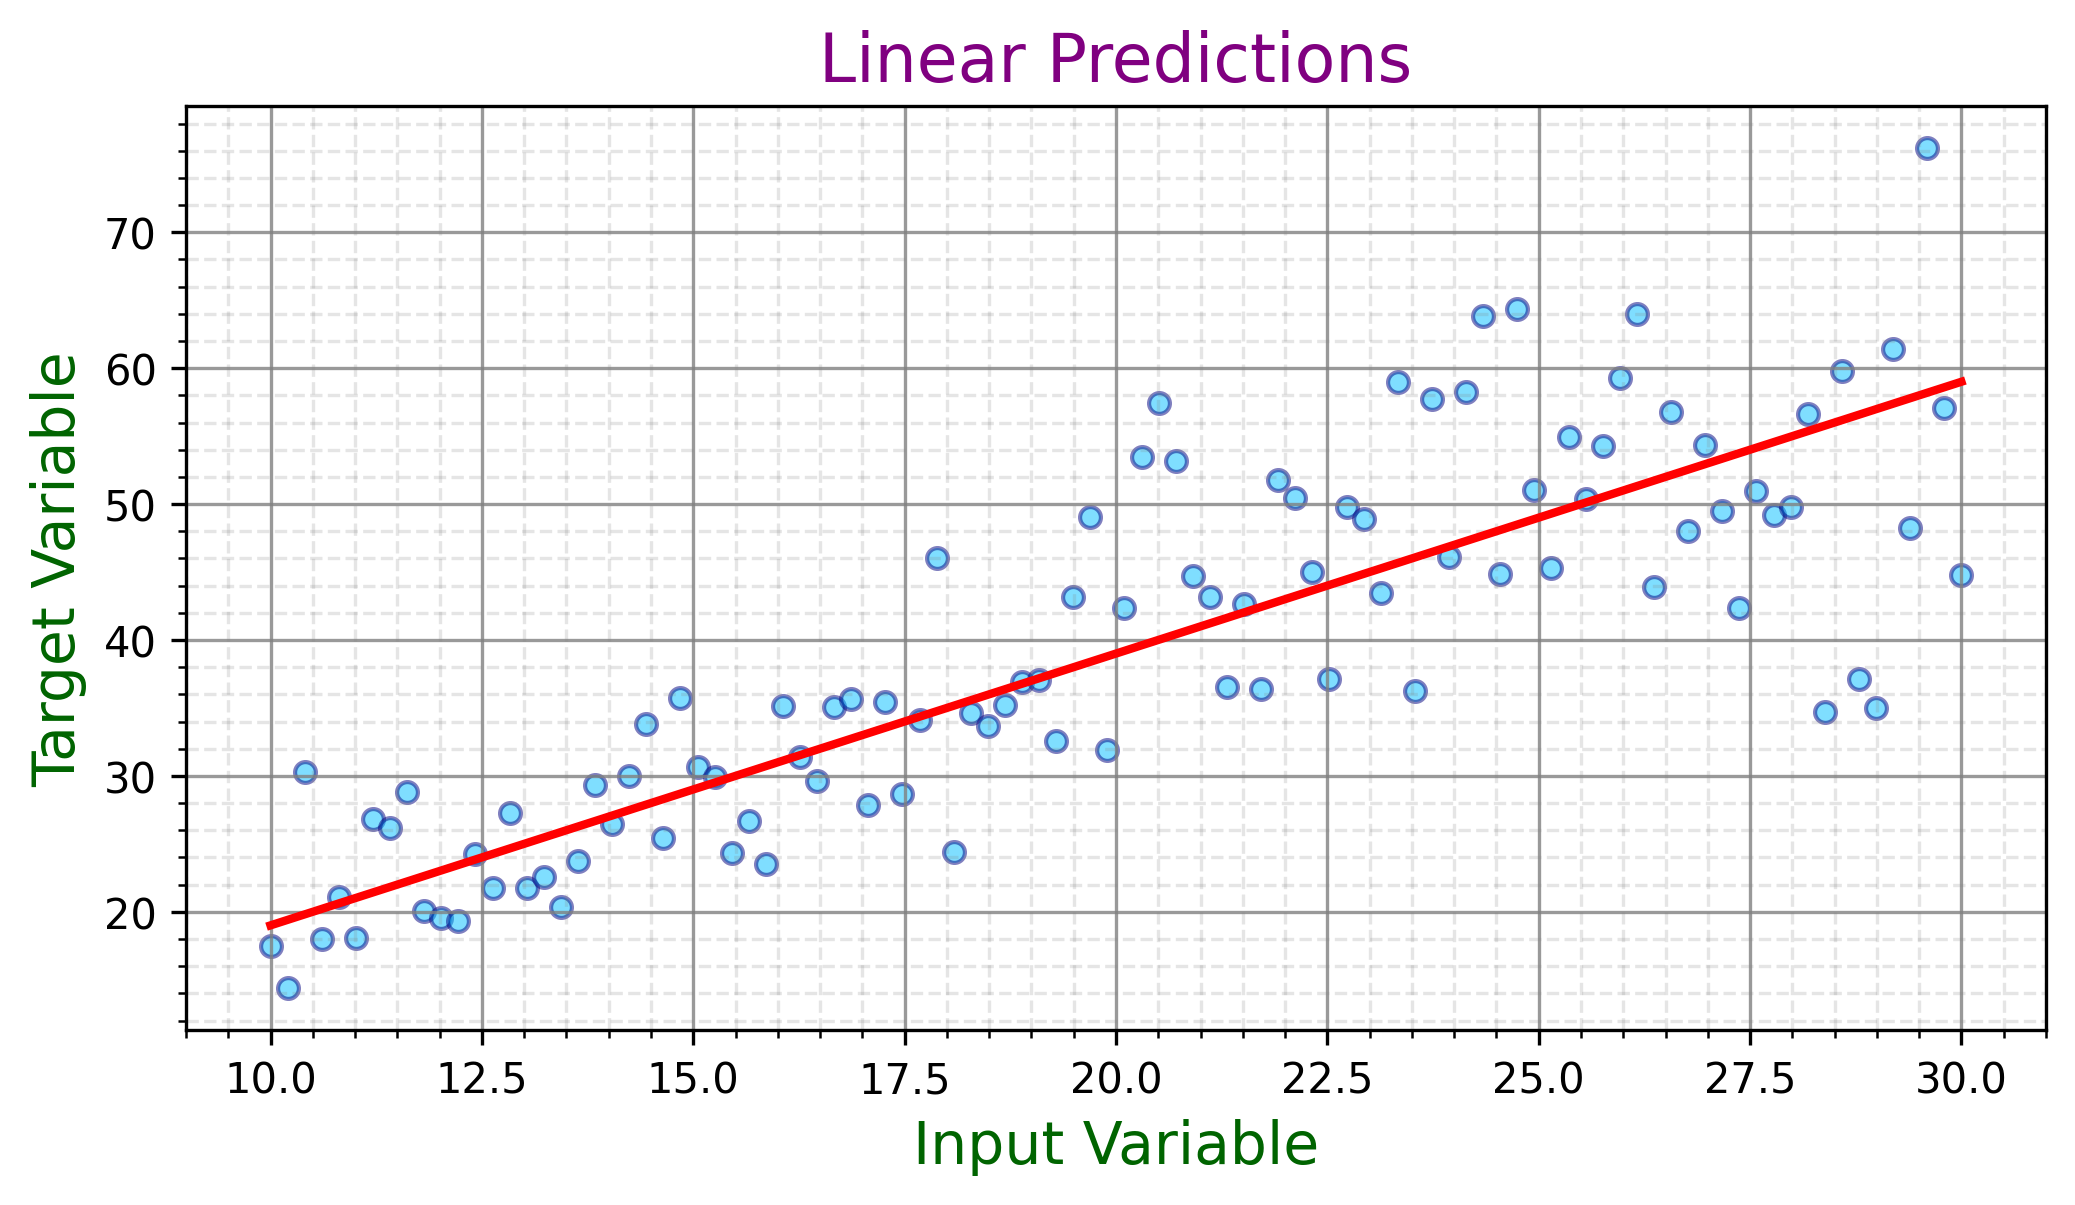

In [9]:
# example with fictitious data
# s is the standard deviation of the noise
s = 5 
x = np.linspace(10,30,100)
y = 2*x-1 + x/3*np.random.normal(0,1,100)
fig, ax = plt.subplots(figsize=(8,4))
#ax.set_xlim(-5, 5)
#ax.set_ylim(-5, 5)
ax.scatter(x, y,s=25,color='deepskyblue',ec='navy',alpha=0.5)
ax.plot(x, 2*x-1, color='red',lw=2)
#ax.plot(xtest_one_feature_sorted, yhat+eps, linestyle='--',color='orange',lw=2)
#ax.plot(xtest_one_feature_sorted, yhat-eps, linestyle='--',color='orange',lw=2)
ax.set_xlabel('Input Variable',fontsize=14,color='darkgreen')
ax.set_ylabel('Target Variable',fontsize=14,color='darkgreen')
ax.set_title('Linear Predictions',fontsize=16,color='purple')
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.savefig('noise3.png',dpi=300)

### Real Data Application with SVR

In [10]:
data = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/concrete.csv?raw=true')

In [11]:
# here we just check what we got
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
# here we need some imports and some data!
# we can import, for example, the concrete data set

In [12]:
# Create the train and test data
# We want to visualize the output of SVR and so we need only one train-test-split
# We also take only one input variable
X = data.loc[:,'cement'].values
X_train, X_test, y_train, y_test = train_test_split(X, data['strength'].values, test_size=0.3, random_state=301)

In [13]:
X_train.shape

(721,)

In [14]:
scale = StandardScaler() # this is not needed unless we have more input features

In [15]:
if len(X_train.shape)==1:
  X_train = X_train.reshape(-1,1)
  X_test = X_test.reshape(-1,1)
else:
  X_train = scale.fit_transform(X_train)
  X_test = scale.transform(X_test)

In [16]:
# here we define a model based on SVR
# so we need to specify the hyper-parameters
eps = 10
C = 1
model = SVR(kernel='linear',C=C,epsilon=eps)

In [17]:
# here we fit SVR on the whole data
model.fit(X_train,y_train)

SVR(C=1, epsilon=10, kernel='linear')

In [18]:
# evaluate the R2 on the test data
model.score(X_test,y_test)

0.2935968831709236

In [19]:
# why do we need a different set of variables?
# Answer: because we want to plot the band
xvals = X_test # xvals is in the range of the input feature
xvals = xvals[xvals[:,0].argsort(),:]
yh = model.predict(xvals)

In [24]:
def svr_results(y_test, X_test, fitted_svr_model):

    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))

    eps = fitted_svr_model.epsilon
    #print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    #print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0][0]))

    print("R2 = {:,.2f}".format(model.score(X_test,y_test)))
    MSE = mse(y_test, fitted_svr_model.predict(X_test))
    print("MSE = {:,.2f}".format(MSE))

    perc_within_eps = 100*np.sum(np.abs(y_test - fitted_svr_model.predict(X_test))<eps)/len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

    # for meaningful plotting we need the x to be ordered
    #dat = np.column_stack([X_test,y_test])
    xtest_sorted = X_test[X_test[:,0].argsort(),:]
    xtest_one_feature_sorted = xtest_sorted[:,0].reshape(-1,1)
    yhat = fitted_svr_model.predict(xtest_sorted)
    # Plot outputs
    fig, ax = plt.subplots(figsize=(8,4))
    #ax.set_xlim(-5, 5)
    #ax.set_ylim(-5, 5)
    ax.scatter(X_test[:,0], y_test,s=25,color='deepskyblue',ec='navy',alpha=0.5)
    ax.plot(xtest_one_feature_sorted, yhat, color='red',lw=2)
    ax.plot(xtest_one_feature_sorted, yhat+eps, linestyle='--',color='orange',lw=2)
    ax.plot(xtest_one_feature_sorted, yhat-eps, linestyle='--',color='orange',lw=2)
    ax.set_xlabel('Cement',fontsize=14,color='darkgreen')
    ax.set_ylabel('Strength',fontsize=14,color='darkgreen')
    ax.set_title('SVR Predictions',fontsize=16,color='purple')
    ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
    ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
    ax.minorticks_on()

C: 1
Epsilon: 10
R2 = 0.29
MSE = 196.64
Percentage within Epsilon = 49.51%


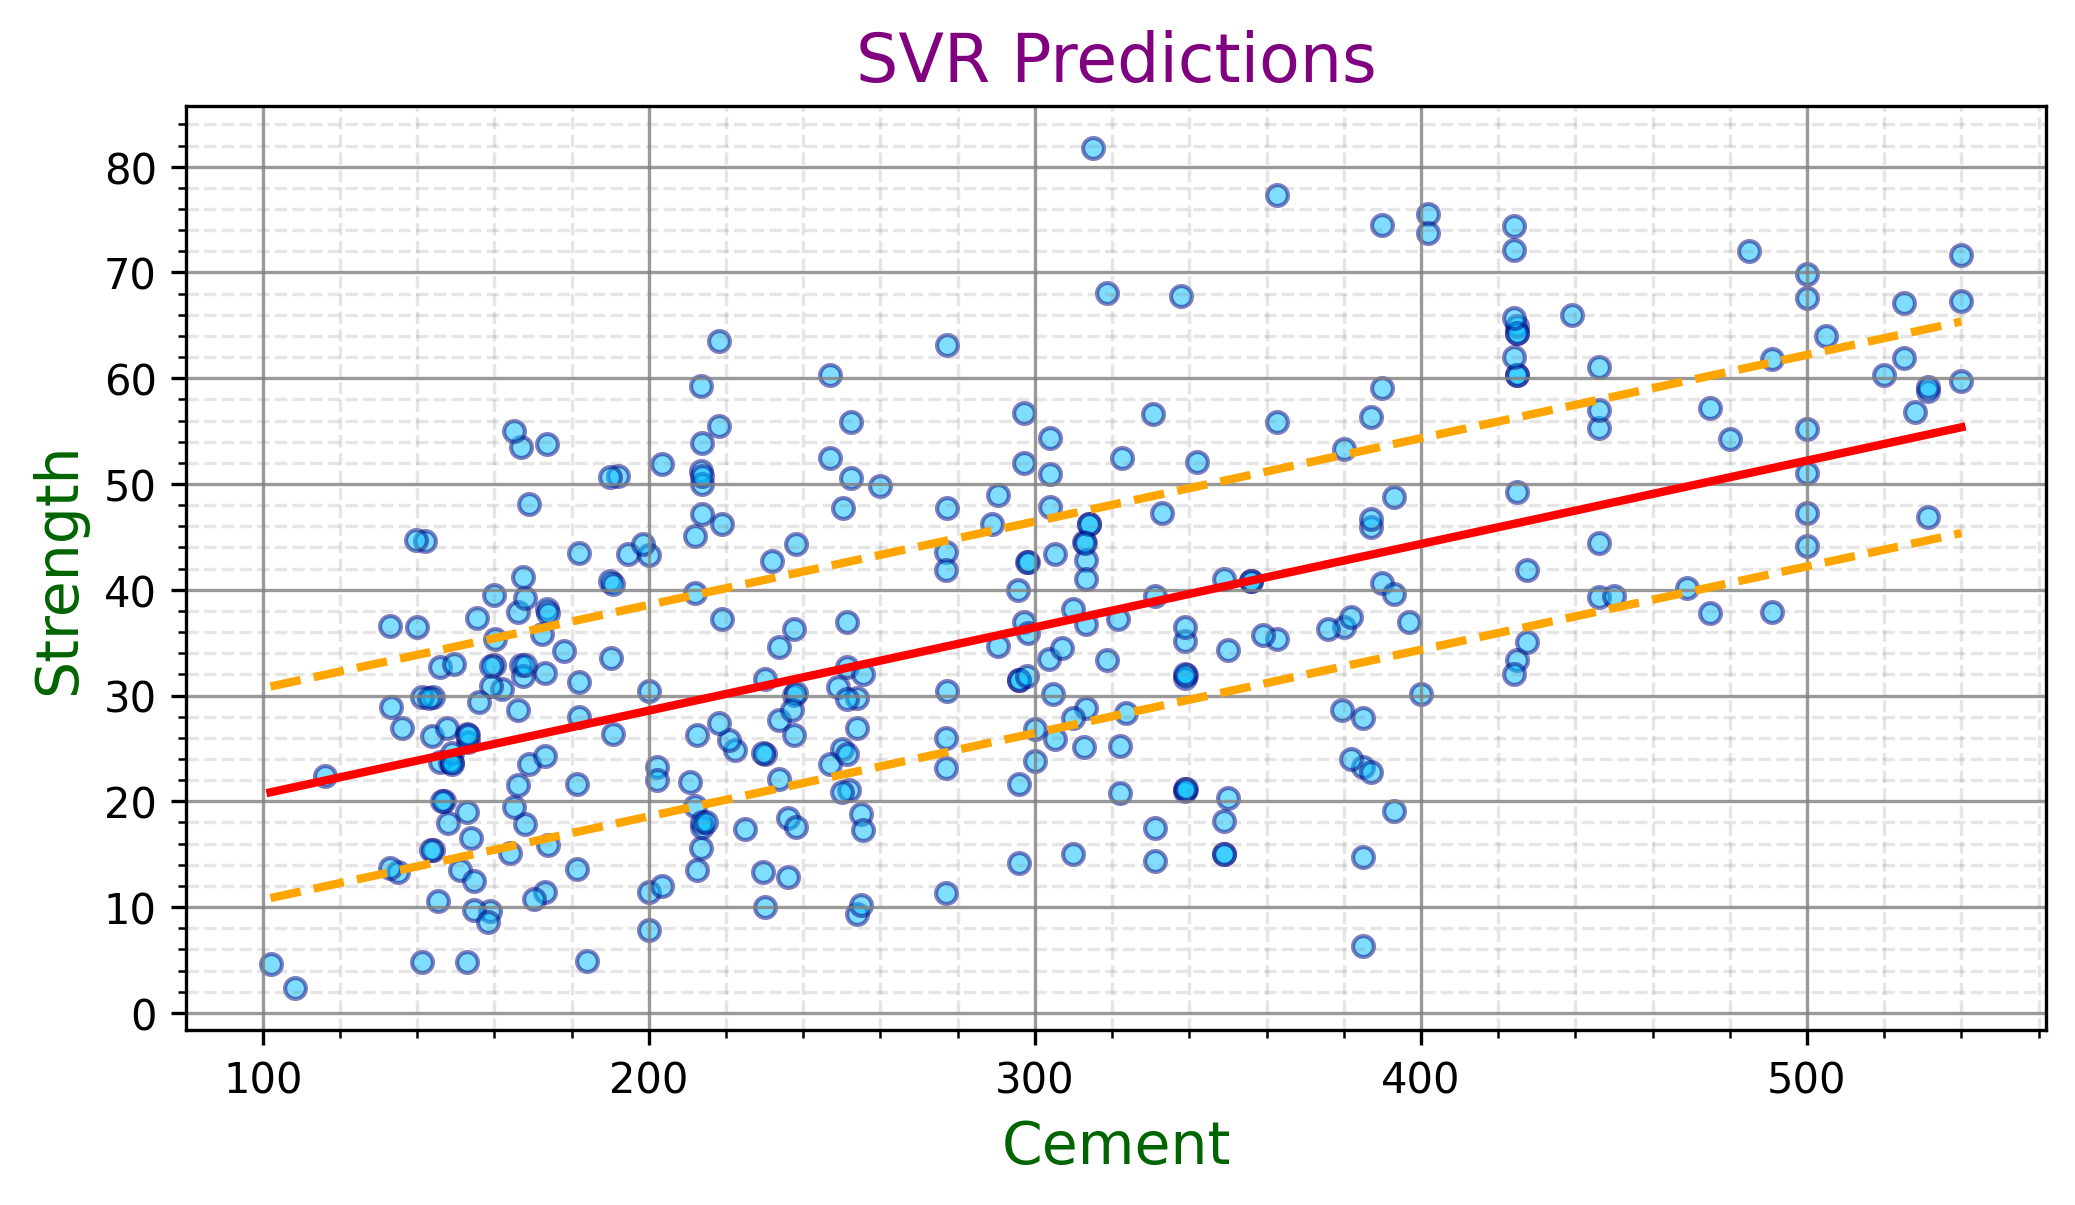

In [25]:
svr_results(y_test,X_test,model)

In [ ]:
# the percentage of data within the band
100*np.sum(np.abs(y_test - model.predict(X_test))<eps)/len(y_test)

13.915857605177994

In [37]:
model = SVR(kernel='poly', degree=3, epsilon=20,C=1)
model.fit(X_train,y_train)

SVR(C=1, epsilon=20, kernel='poly')

C: 1
Epsilon: 20
R2 = 0.29
MSE = 198.65
Percentage within Epsilon = 85.76%


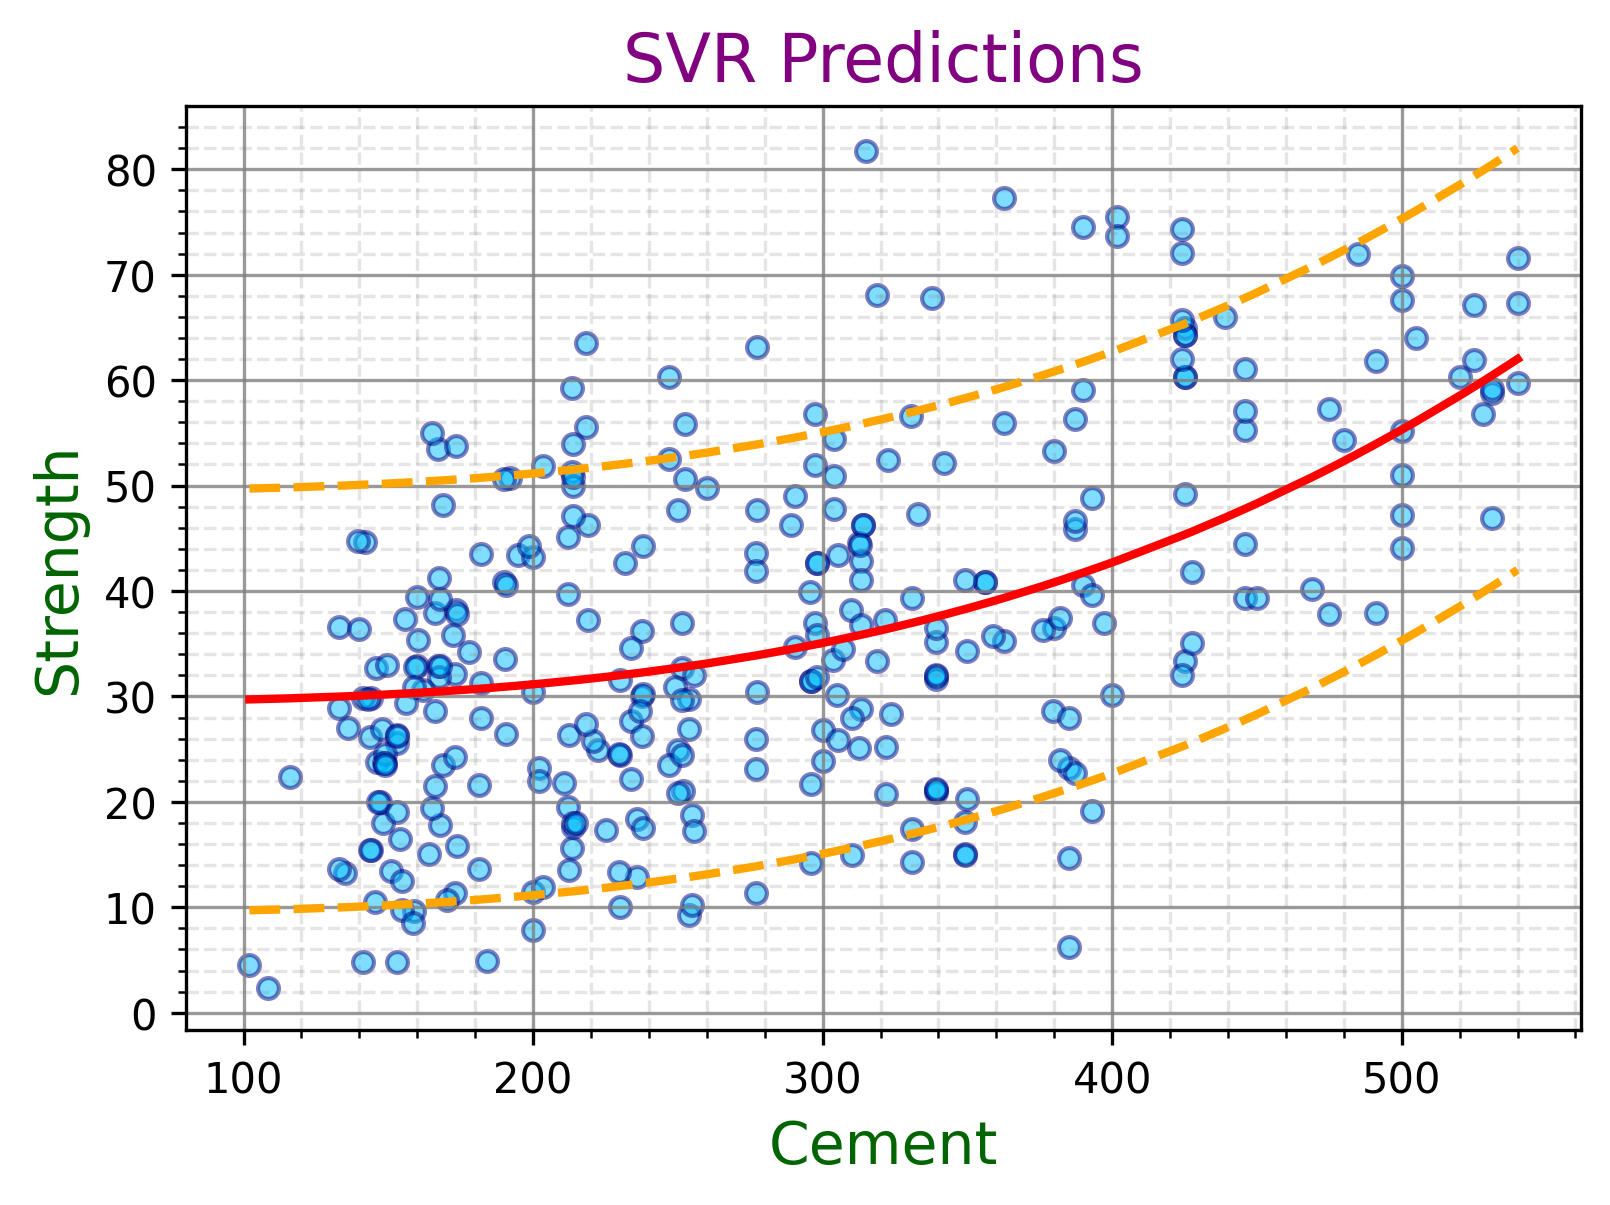

In [38]:
svr_results(y_test,X_test,model)

## What is the meaning of the Band? - Simulation Study

In [ ]:
# example with fictitious data
x = np.linspace(10,30,100)
y = 2*x-1 + 2*np.random.normal(0,1,100)

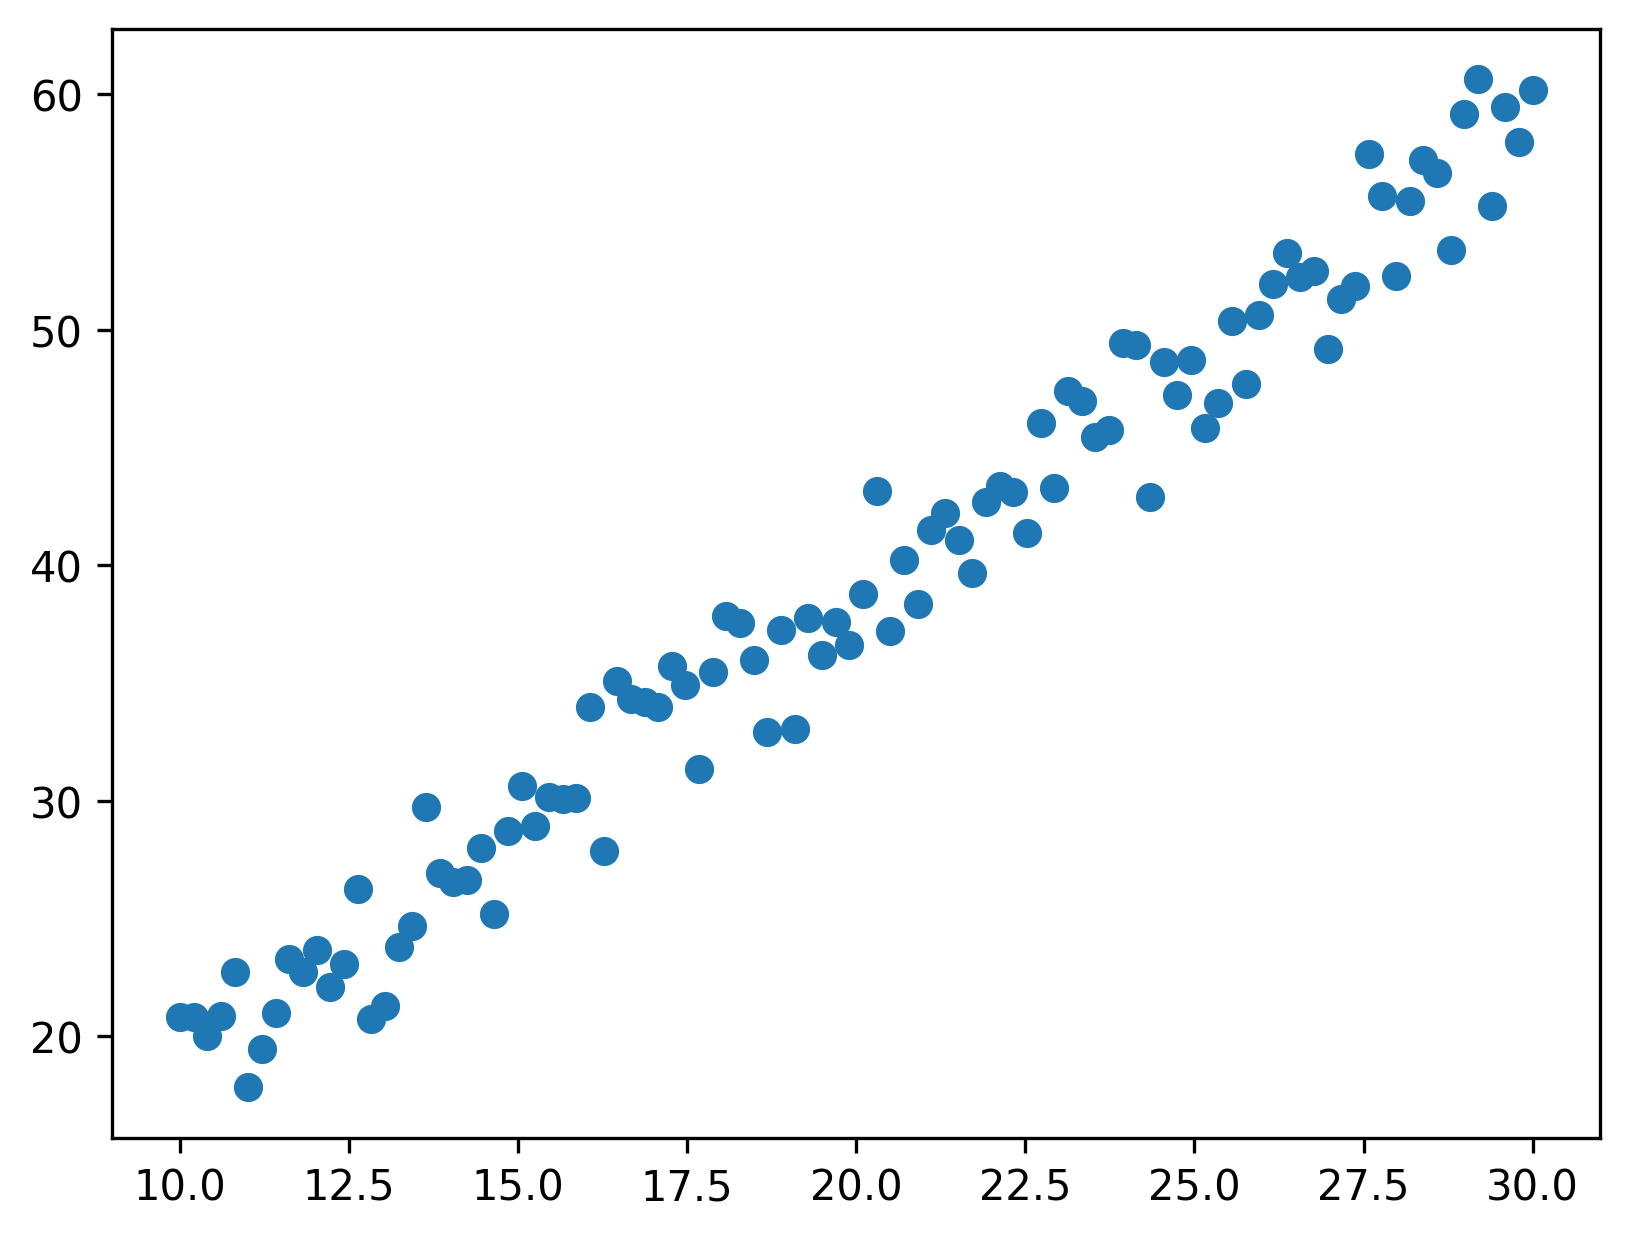

In [ ]:
plt.scatter(x,y)
plt.show()

C: 5
Epsilon: 3
R2 = 0.97
MSE = 4.03
Percentage within Epsilon = 86.00%


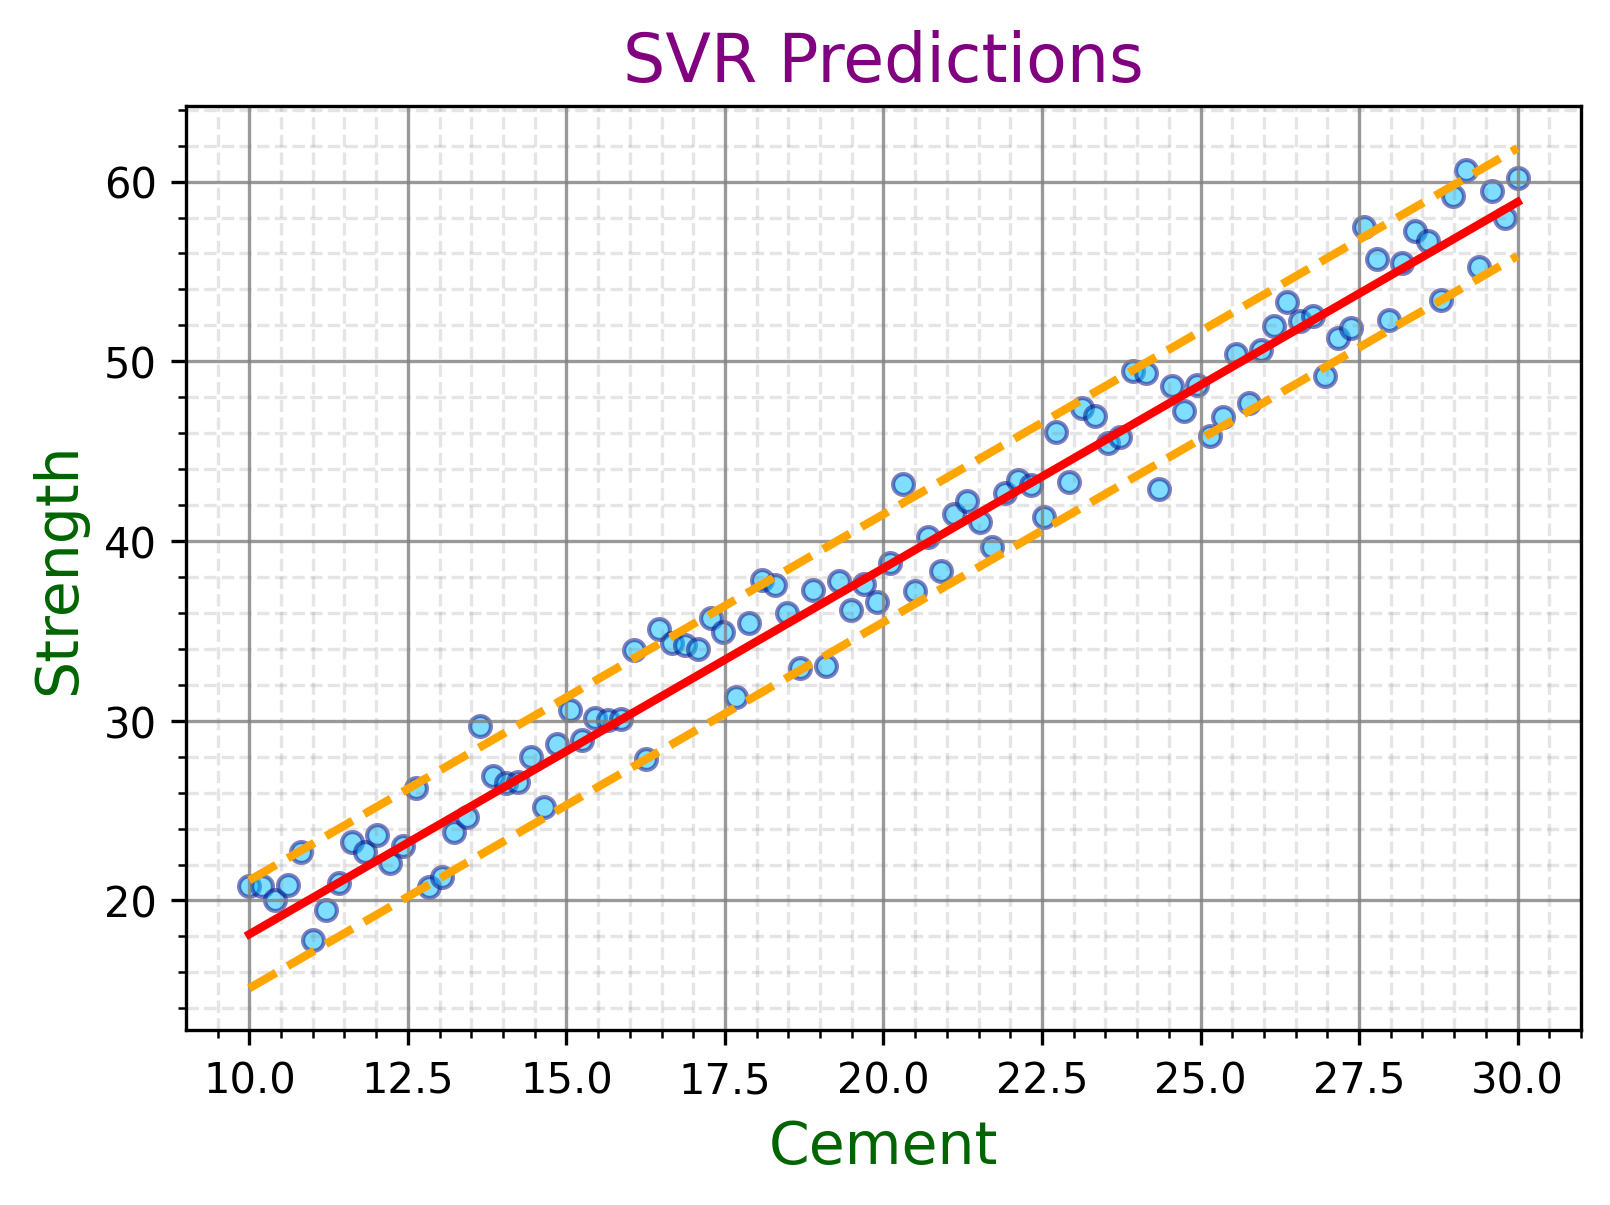

In [ ]:
model = SVR(kernel='linear', epsilon=3,C=5)
model.fit(x.reshape(-1,1),y)
svr_results(y,x.reshape(-1,1),model)

C: 5
Epsilon: 3
R2 = 0.96
MSE = 5.73
Percentage within Epsilon = 80.00%


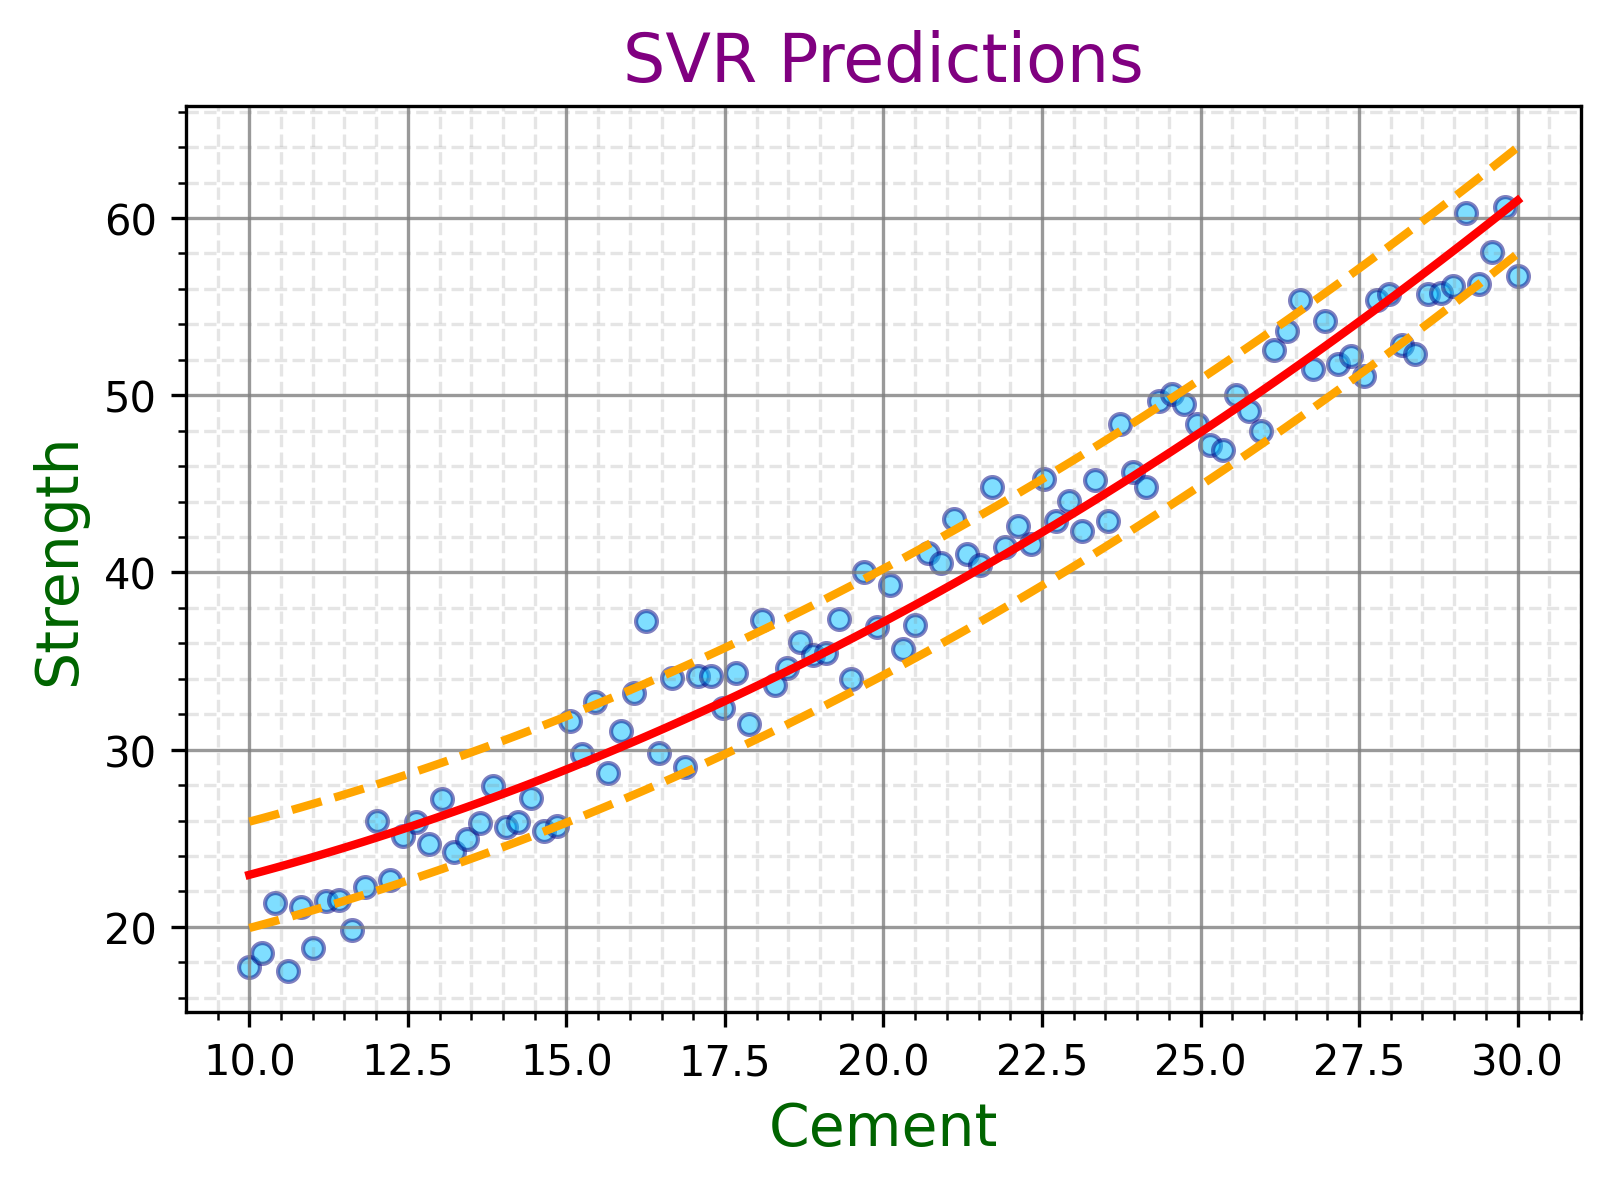

In [ ]:
model = SVR(kernel='poly', degree=2,epsilon=3,C=5)
model.fit(x.reshape(-1,1),y)
svr_results(y,x.reshape(-1,1),model)

In [ ]:
scale = StandardScaler()

In [ ]:
xtrain_scaled = scale.fit_transform(X_train)
xtest_scaled = scale.transform(X_test)

In [ ]:
model.fit(xtrain_scaled,y_train)

SVR(C=5, epsilon=3, kernel='linear')

In [ ]:
model.predict(xtest_scaled)

In [ ]:
100*np.sum(np.abs(y_test - model.predict(xtest_scaled))<eps)/len(y_test)

13.915857605177994

C: 5
Epsilon: 3
R2 = 0.25
MSE = 214.77
Percentage within Epsilon = 14.29%


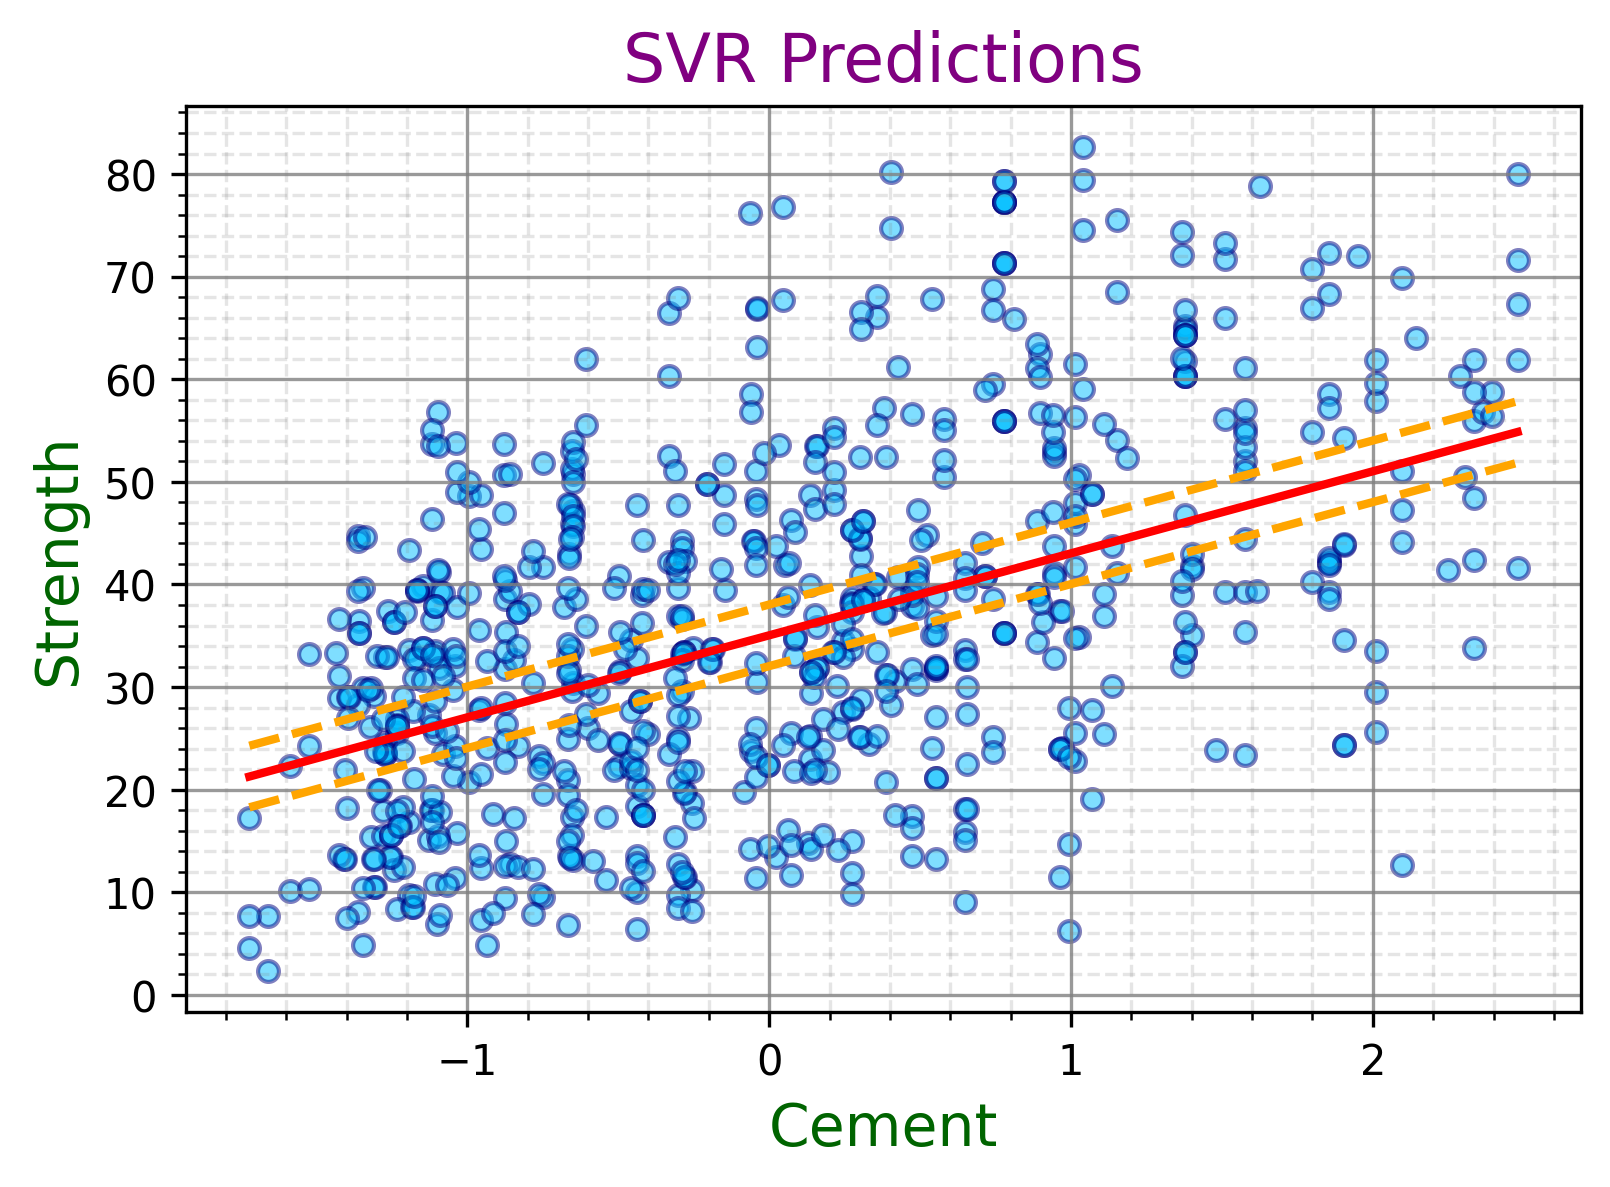

In [ ]:
svr_results(y_train,xtrain_scaled,model)

## SVR with polynomial kernel

In [ ]:
eps = 5
model = SVR(kernel='poly',degree=3,C=1.5,epsilon=eps)

In [ ]:
model.fit(X_train,y_train)

SVR(C=1.5, epsilon=5, kernel='poly')

C: 1.5
Epsilon: 5
R2 = 0.21
MSE = 208.61
Percentage within Epsilon = 27.51%


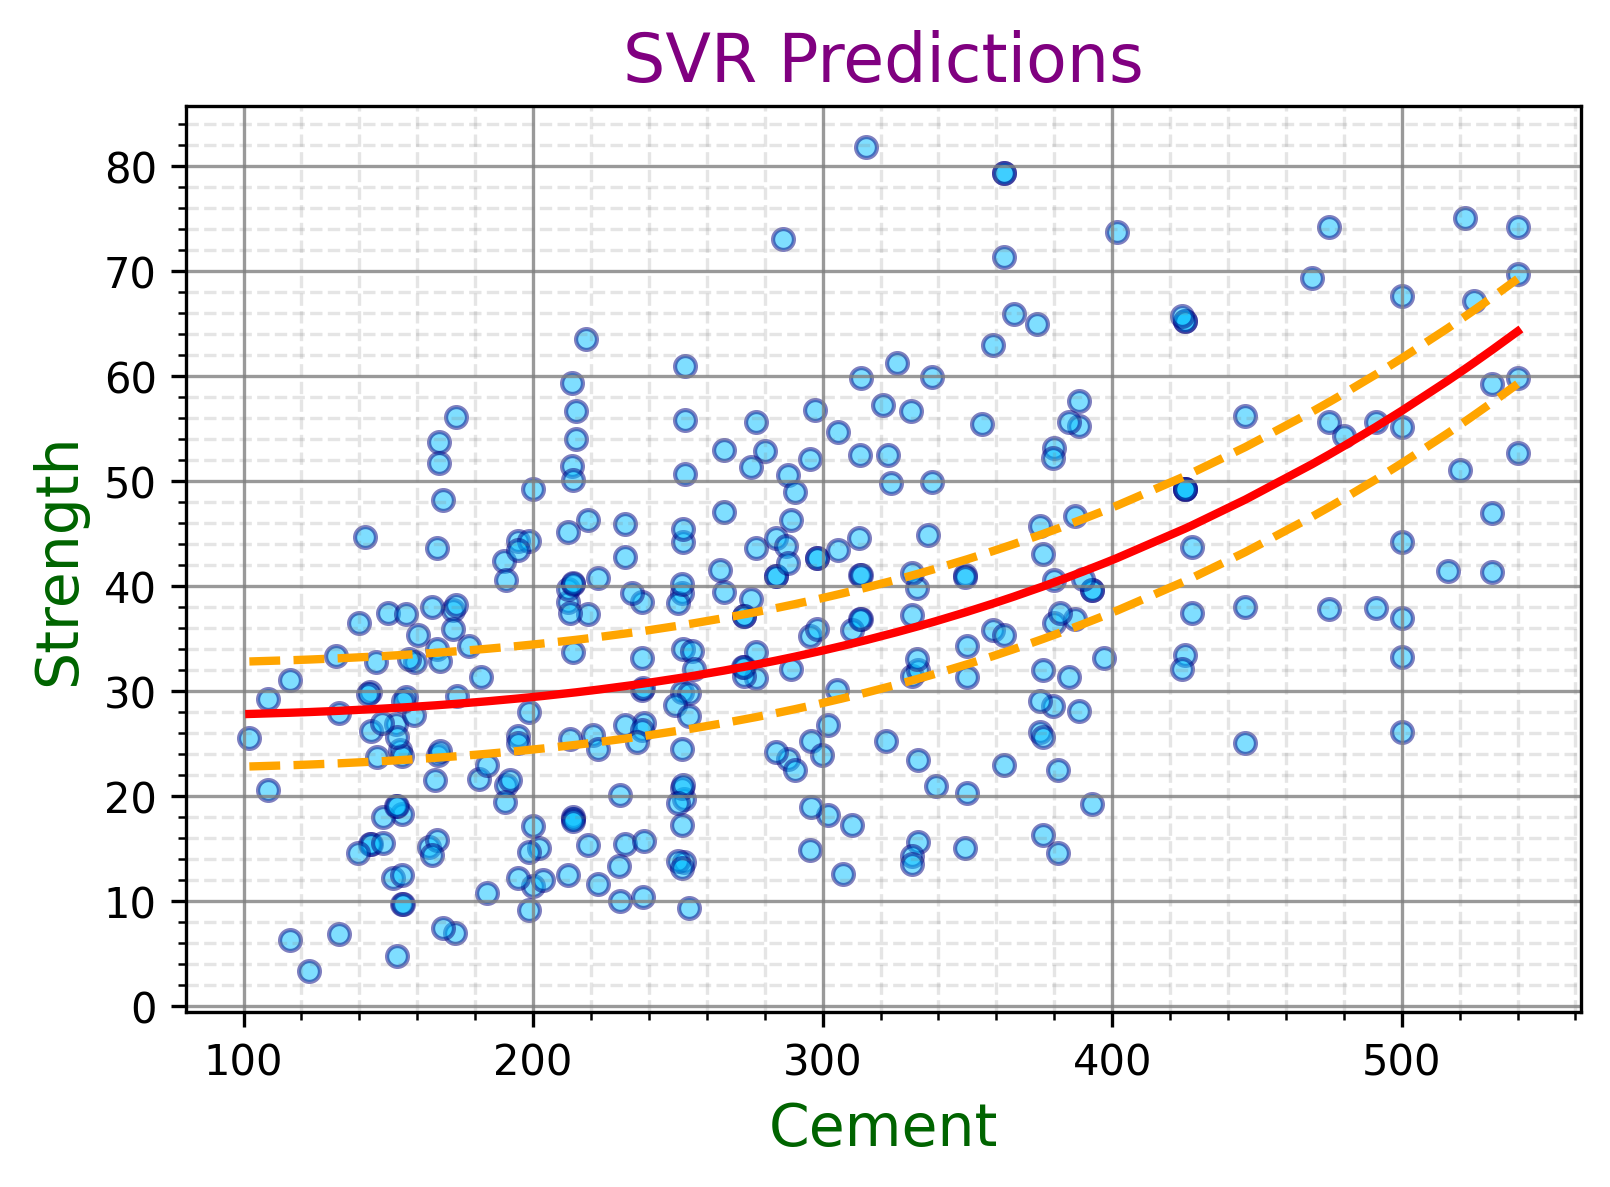

In [ ]:
svr_results(y_test,X_test,model)

Thoughts: maybe this is not a great model and perhaps we can improve it by increasing the model complexity and/or changing the hyper-parameters.

In [ ]:
# we would like to use all the different input variables
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,'cement':'age'].values, data['strength'].values, test_size=0.3, random_state=123)

In [ ]:
scale = StandardScaler()

In [ ]:
xtrain_scaled = scale.fit_transform(X_train)

In [ ]:
xtest_scaled = scale.transform(X_test)

In [ ]:
# let's make a multivariate SVR model
model.fit(xtrain_scaled,y_train)

SVR(C=1.5, epsilon=5, kernel='poly')

In [ ]:
model.score(xtest_scaled,y_test)

0.5294591095269214

In [ ]:
yhat_test = model.predict(xtest_scaled)

In [ ]:
# this means we have to order the data based on the values of the input "cement"
dat = np.column_stack([X_test[:,0],yhat_test])

In [ ]:
dat_sorted = dat[dat[:,0].argsort(),:]

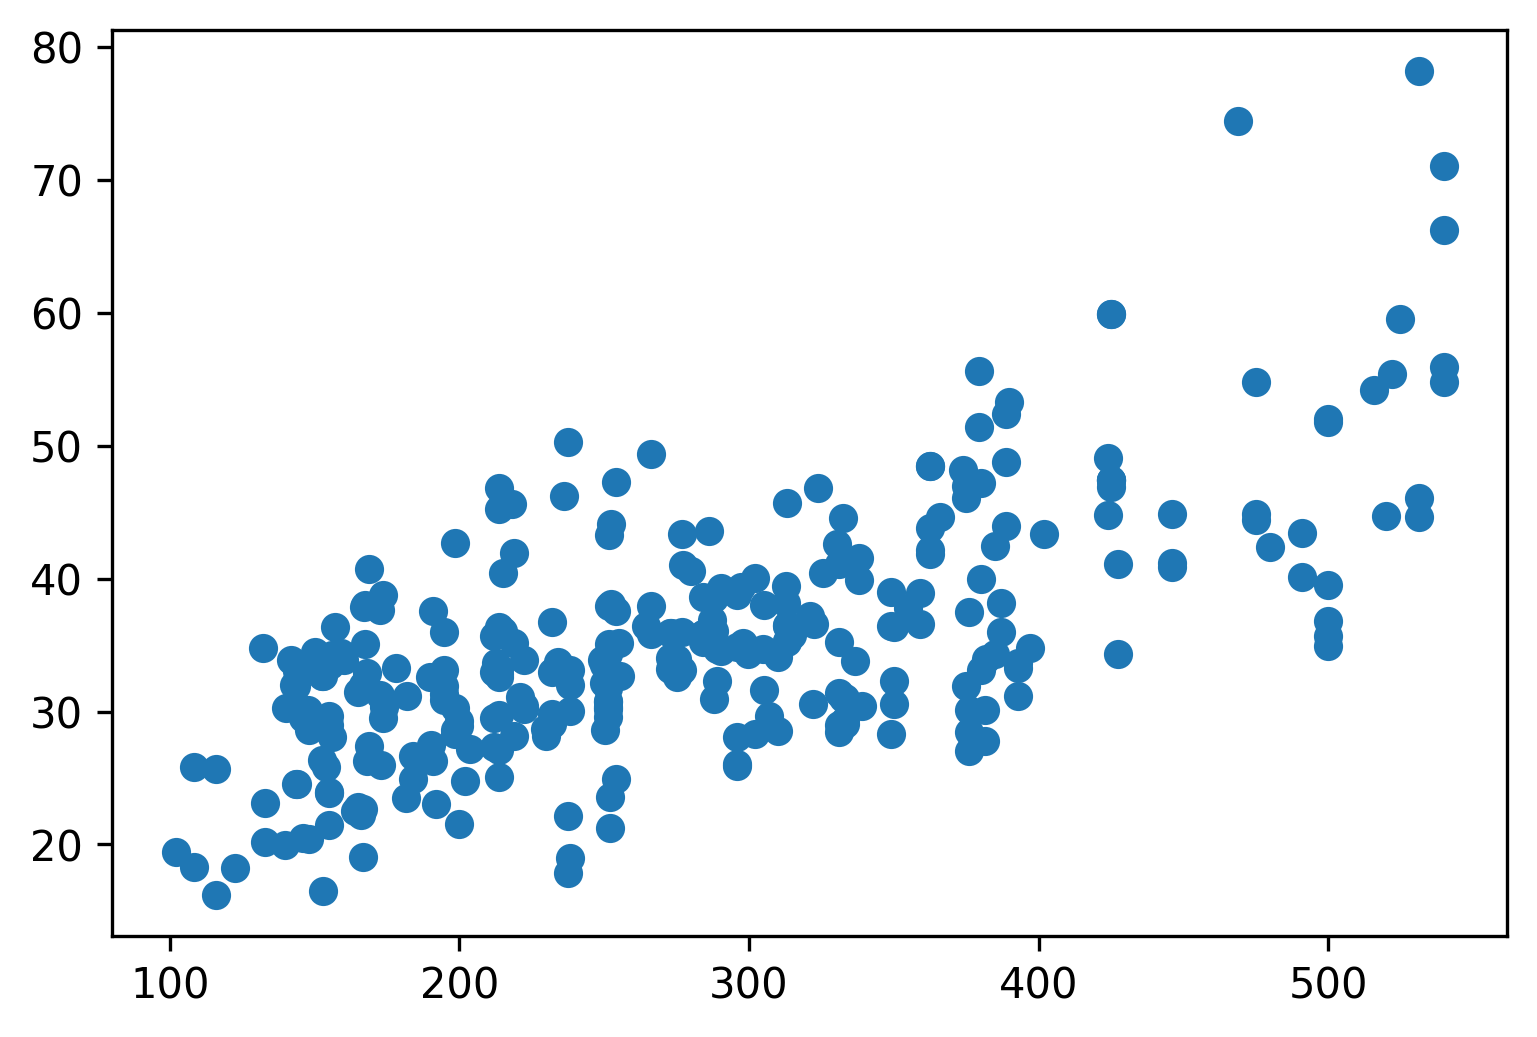

In [ ]:
plt.scatter(dat_sorted[:,0],dat_sorted[:,1])

In [ ]:
eps = 10
model = SVR(kernel='poly',degree=3,C=2.0,epsilon=eps)

In [ ]:
model.fit(X_train,y_train)

SVR(C=2.0, epsilon=10, kernel='poly')

We need sorted values for X_test!!

##<font size=6> SVM with Radial Basis Function Kernel (the kernel "trick") for Classification </font>

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IuYqAUe7cV8pwxwTUlxQTVUPI2smrcME'
width='1000px' />
<figcaption>SVM with Radial Basis Function Kernel</figcaption></center>
</figure>

For this we would need at least one landmark point $x_0$. The following is also called a "Gaussian" kernel

$$\Large
(x,y) \rightarrow \left(x,y,z:=e^{-\gamma[(x-x_0)^2+(y-y_0)^2]}\right)
$$